# Praktikum Kecerdasan Buatan - Post-Test 6: Unsupervised Learning
Nama: Hangberki Visnu Go
NIM: 2009106088

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv("genre_musik.csv", index_col=0)
df.head(5)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,stroke
0,32894.0,5029.0,28371.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1.0,0.115,-5.201,1.0,0.0748,274.0,3.0,0.759,5.0,27.0
1,46652.0,6117.0,34817.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,5.0,0.124,-7.043,1.0,0.0300,4193.0,3.0,0.531,5.0,31.0
2,30097.0,1591.0,15024.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,11.0,0.534,-4.617,0.0,0.0345,8138.0,3.0,0.333,5.0,28.0
3,62177.0,1707.0,23372.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,4.0,0.157,-4.498,0.0,0.2390,8158.0,3.0,0.270,5.0,34.0
4,24907.0,6519.0,8649.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,9.0,0.157,-6.266,0.0,0.0413,13021.0,3.0,0.323,5.0,32.0


In [36]:
x_data = df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo']]

# K-Means Clustering

## k_mean = KMeans(n_clusters=2)
k_mean.fit(x_data)

In [38]:
x_labels = k_mean.labels_
print(x_labels)

[0 0 0 ... 0 1 1]


In [39]:
df_k_mean = pd.DataFrame({"Labels": x_labels, "Outcome": df["stroke"]})
crosstab = pd.crosstab(df_k_mean["Labels"], df_k_mean["Outcome"])
crosstab

Outcome,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,Negative,Positive
Labels,,,,,,,,,,,,,,,,,,,,,
0,58,64,114,134,127,164,134,152,148,157,...,2,1,1,0,1,2,1,1,437,23
1,31,33,44,66,73,72,81,78,93,92,...,0,0,1,1,1,0,0,0,257,8


In [40]:
cluster_range = range(1, 11)
inertias = []

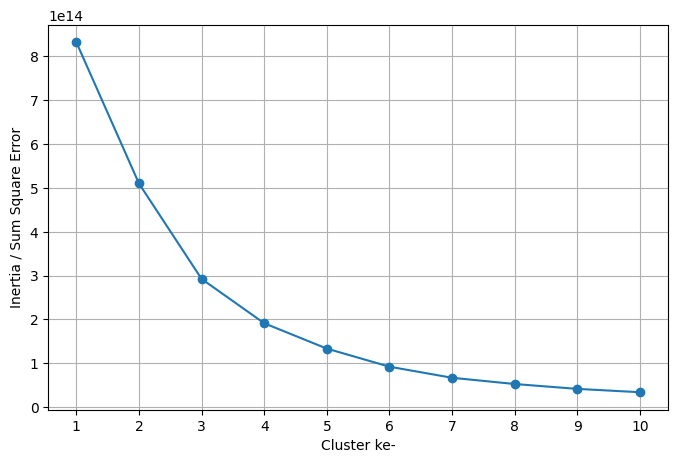

In [41]:
for n in cluster_range:
    k_mean = KMeans(n_clusters=n)
    k_mean.fit(x_data)
    inertias.append(k_mean.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia / Sum Square Error')
plt.xticks(cluster_range)
plt.grid()
plt.show()